In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import discriminant_analysis
%matplotlib inline
data = pd.read_csv('numeric sequence.csv', sep = ',', engine = 'python')
processed_data = data
for i in range (1, 15):
     processed_data['feature'+str(i)] = data['feature'+str(i*2-1)]*2 + data['feature'+str(i*2)]
to_drop=[]
for i in range (15, 29):
    to_drop.append('feature'+str(i))
processed_data = processed_data.drop(to_drop, 1).drop('label', 1)
processed_data = processed_data.replace(0, 'A')\
                              .replace(1, 'T')\
                              .replace(2, 'C')\
                              .replace(3, 'G')
processed_data = pd.get_dummies(processed_data)
processed_data=pd.concat((processed_data, data['label']), axis = 1)
data = processed_data
X, X_test, y, y_test = train_test_split(data.drop('label', axis=1), data['label'], test_size = 0.1, 
                                                    random_state = 2)

# Ada boost

Алгоритм усиливает классификаторы, объединяя их в «комитет». AdaBoost является адаптивным в том смысле, что каждый следующий комитет классификаторов строится по объектам, неверно классифицированным предыдущими комитетами. AdaBoost чувствителен к шуму в данных и выбросам. Однако он менее подвержен переобучению по сравнению с другими алгоритмами машинного обучения

## Зависимость ошибок от количества деревьев

In [10]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
est_number = np.arange(1, 100)
model = ensemble.AdaBoostClassifier()
grid = GridSearchCV(model, param_grid = {'n_estimators': est_number})
grid.fit(X, y)
min_err_cv = 1 - grid.best_score_
argmin_err_cv = grid.best_estimator_.n_estimators
print(min_err_cv)
print("Число деревьев:")
print(argmin_err_cv)

0.149074074074
Число деревьев:
30


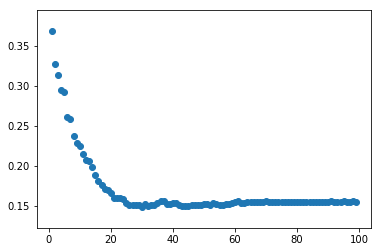

In [11]:
score = 1 - np.array([i for i in grid.cv_results_['mean_test_score']])
depth = np.array([i['n_estimators'] for i in grid.cv_results_['params']])
plt.scatter(depth, score)

Поменяем learning rate:

In [12]:
est_number = np.arange(6, 25, 2)
learning_rate_range = np.arange(0.1, 3, 0.2)
model = ensemble.AdaBoostClassifier()
grid = GridSearchCV(model, param_grid = {'learning_rate': learning_rate_range, 'n_estimators': est_number})
grid.fit(X, y)
min_err_cv = 1 - grid.best_score_
argmin_err_cv = grid.best_estimator_.n_estimators
best_learning_rate = grid.best_estimator_.learning_rate
print("Ошибка:", min_err_cv)
print("Число деревьев:", argmin_err_cv)
print("Learning rate:", best_learning_rate)

Ошибка: 0.155555555556
Число деревьев: 24
Learning rate: 0.9


In [13]:
score = 1 - np.array([i for i in grid.cv_results_['mean_test_score']])
treesN = np.array([i['n_estimators'] for i in grid.cv_results_['params']])
learningRate = np.array([i['learning_rate'] for i in grid.cv_results_['params']])
#plt.scatter(depth, score)

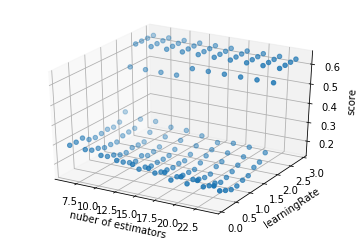

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(treesN, learningRate, score)
ax.set_xlabel('nuber of estimators')
ax.set_ylabel('learningRate')
ax.set_zlabel('score')
plt.show()

Меняем высоты деревьев, зафиксировав самый удачный learning rate

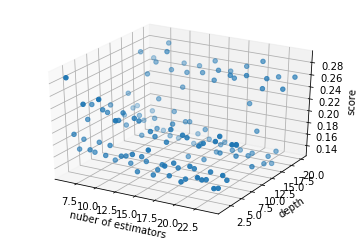

In [15]:
from sklearn.tree import DecisionTreeClassifier
estimators = []
heights = []
scores = []
depths = [1, 2, 3, 4, 5, 6, 10, 13, 14, 15, 16, 17, 20]
est_number = np.arange(6, 25, 2)
maxErr=1
for i in est_number:
    for j in depths:
        clf = ensemble.AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=j), n_estimators=i, learning_rate=0.9)
        clf = clf.fit(X, y)
        err_test = np.mean(y_test != clf.predict(X_test))
        estimators.append(i)
        heights.append(j)
        scores.append(err_test)
        if (err_test < maxErr):
            maxErr=err_test
            maxDepths=j
            maxest_number=i

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(estimators, heights, scores)
ax.set_xlabel('nuber of estimators')
ax.set_ylabel('depth')
ax.set_zlabel('score')
plt.show()

In [16]:
print("Best result for Ada boost: learning rate = 0.9, depth = ", maxDepths, "number of estimators = ", maxest_number)
print("Error is ", maxErr)

Best result for Ada boost: learning rate = 0.9, depth =  15 number of estimators =  24
Error is  0.133333333333
